# The Weather Dataset
***
Here, 
The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.


This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:\\Users\PAWAN\\Downloads\\Project+1+-+Weather+Dataset.csv")

In [4]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
data.shape

(8784, 8)

In [6]:
data.index

RangeIndex(start=0, stop=8784, step=1)

In [7]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
data["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [11]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [12]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

# Step 1: Data Cleaning

Convert Date/Time into datetime format, set as index.

In [13]:
data["Date/Time"]=pd.to_datetime(data["Date/Time"])

In [14]:
data.set_index(data["Date/Time"],inplace=True)


In [15]:
data.pop("Date/Time")

Date/Time
2012-01-01 00:00:00   2012-01-01 00:00:00
2012-01-01 01:00:00   2012-01-01 01:00:00
2012-01-01 02:00:00   2012-01-01 02:00:00
2012-01-01 03:00:00   2012-01-01 03:00:00
2012-01-01 04:00:00   2012-01-01 04:00:00
                              ...        
2012-12-31 19:00:00   2012-12-31 19:00:00
2012-12-31 20:00:00   2012-12-31 20:00:00
2012-12-31 21:00:00   2012-12-31 21:00:00
2012-12-31 22:00:00   2012-12-31 22:00:00
2012-12-31 23:00:00   2012-12-31 23:00:00
Name: Date/Time, Length: 8784, dtype: datetime64[ns]

In [16]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


Rename columns

In [17]:
data.rename(columns={
    'Temp_C': 'Temperature_C',
    'Rel Hum_%': 'Humidity_%',
}, inplace=True)

Handle missing/null values.

In [18]:
data.isnull().sum()

Temperature_C       0
Dew Point Temp_C    0
Humidity_%          0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# Step 2: Descriptive Statistics

Average, min, max of each numerical column.

In [19]:
data.describe()

,Temperature_C,Dew Point Temp_C,Humidity_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Most common weather condition.

In [20]:
data["Weather"].mode()

0    Mainly Clear
Name: Weather, dtype: object

Day/night temperature differences.

In [21]:
data["Hour"]=data.index.hour

data["Time_of_day"] = data["Hour"].apply(lambda x : "Day" if 6<= x <18 else "Night" )

data.groupby("Time_of_day")["Time_of_day"].count()

Time_of_day
Day      4392
Night    4392
Name: Time_of_day, dtype: int64

In [22]:
day_mean= (data["Temperature_C"][data["Time_of_day"]=="Day"]).mean()
night_mean=(data["Temperature_C"][data["Time_of_day"]=="Night"]).mean()

temp_diff = day_mean-night_mean
temp_diff

np.float64(1.8450591985428053)

In [23]:
day_night_stats = data.groupby("Time_of_day")["Temperature_C"].agg(["mean"])
print(day_night_stats)

                 mean
Time_of_day          
Day          9.720674
Night        7.875615


# Step 3: Exploratory Data Analysis (EDA)

Temperature distribution histogram.

Line plot of temperature vs. time (seasonal trend).



Wind speed distribution.

Correlation heatmap across all numeric columns.

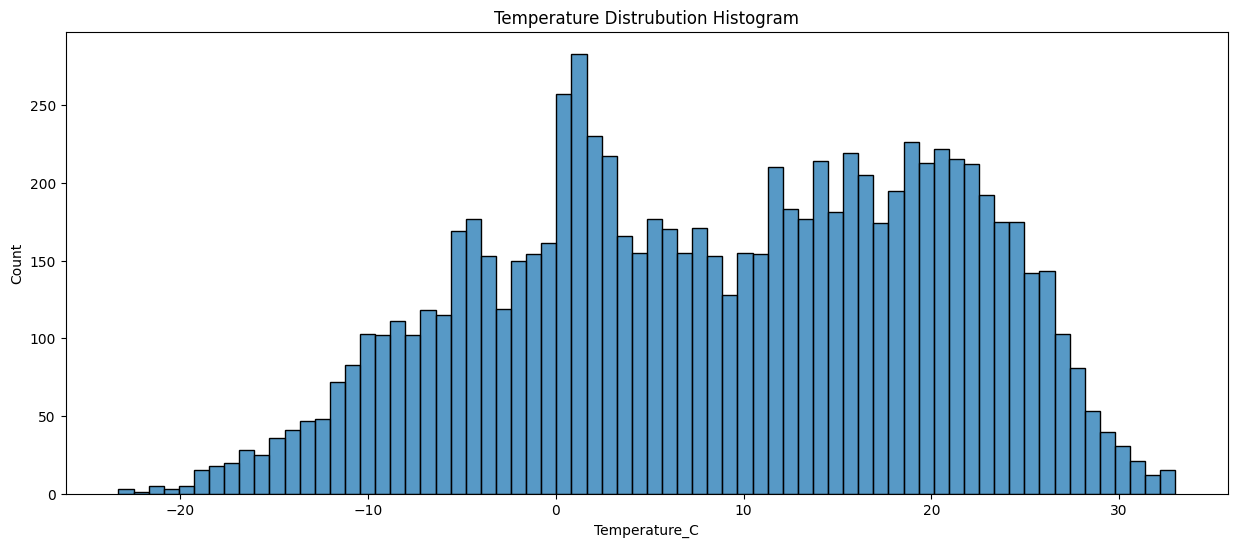

In [24]:
plt.figure(figsize=(15,6))
sns.histplot(data=data,x="Temperature_C",bins=70)
plt.title("Temperature Distrubution Histogram")
plt.show()

In [25]:
data.columns

Index(['Temperature_C', 'Dew Point Temp_C', 'Humidity_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Hour', 'Time_of_day'],
      dtype='object')

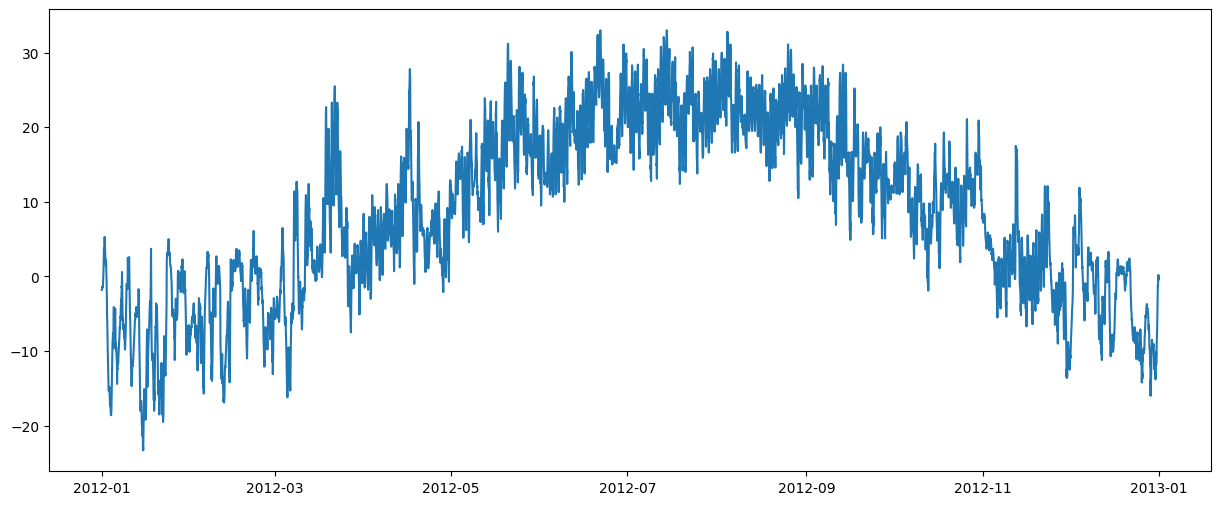

In [26]:
plt.figure(figsize=(15,6))
plt.plot(data.index, data["Temperature_C"])
plt.show()

PairPlot

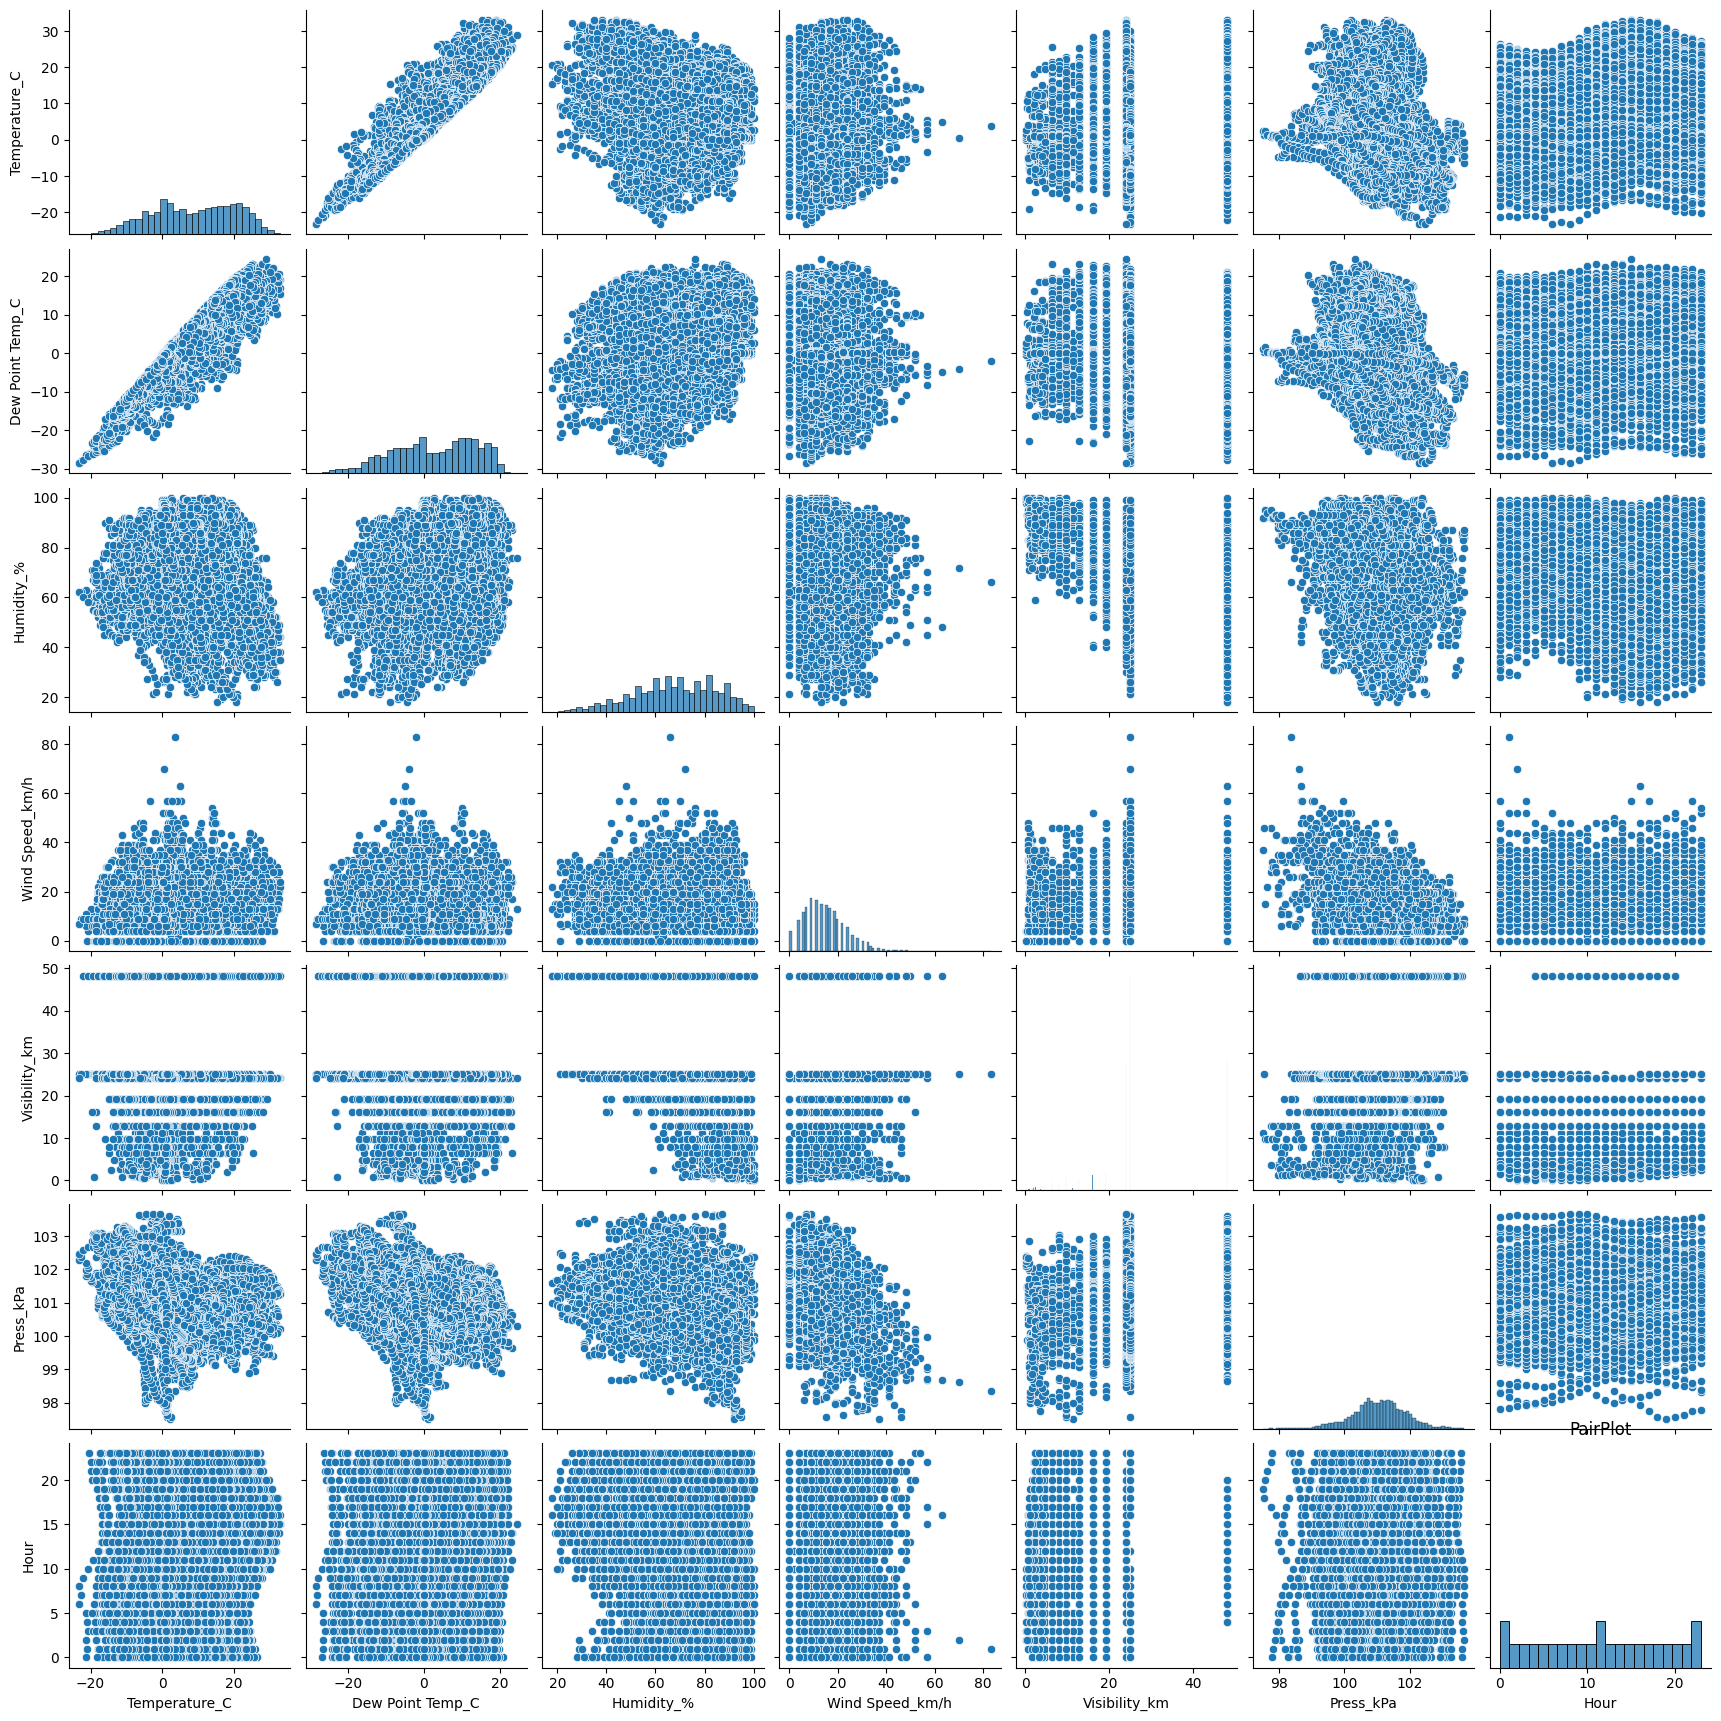

In [27]:
sns.pairplot(data[['Temperature_C', 'Dew Point Temp_C', 'Humidity_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa','Hour', 'Time_of_day']])
plt.title("PairPlot")
plt.show()

Wind speed distribution.

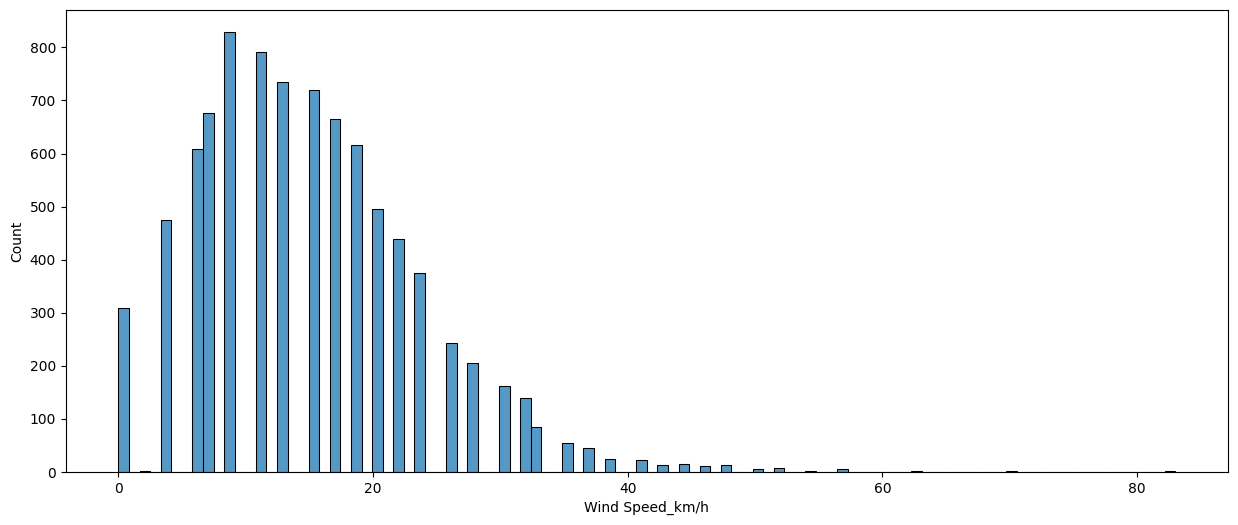

In [28]:
plt.figure(figsize=(15,6))
sns.histplot(data=data,x= 'Wind Speed_km/h',bins=100)
plt.show()

Correlation heatmap across all numeric columns.

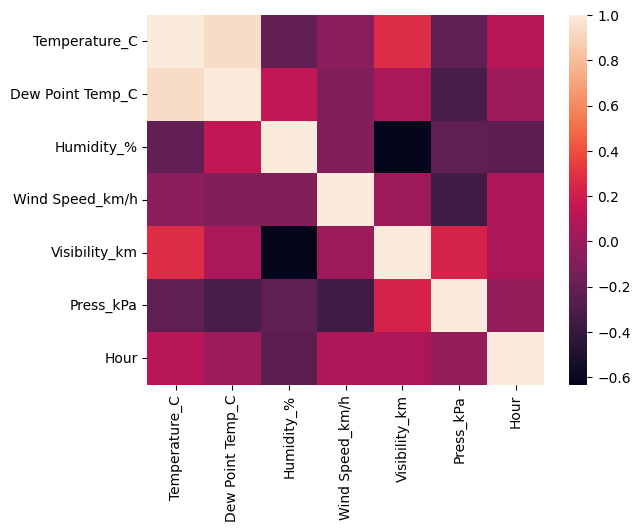

In [29]:
corr= data.corr(numeric_only=True)

sns.heatmap(corr,yticklabels=True)
plt.show()

# Step 4: Insights 



Wind Speed = 4 km/h occurred X times.

In [30]:
data["Wind Speed_km/h"].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [31]:
count_4km_windspeed= data["Wind Speed_km/h"][data["Wind Speed_km/h"]==4].count()
print(f"Wind Speed = 4 km/h occurred {count_4km_windspeed} times")

Wind Speed = 4 km/h occurred 474 times


Mean visibility = Y km.

In [32]:
print(f'Mean Visibility {round(data["Visibility_km"].mean(),2)} km')

Mean Visibility 27.66 km


Most common weather condition = Clear.

In [33]:
Most_common_weather_Condition = data["Weather"].mode()[0]
print(f"Most common weather Condition : {Most_common_weather_Condition}")



Most common weather Condition : Mainly Clear


Temperature & dew point are highly correlated.

In [34]:
data.columns

Index(['Temperature_C', 'Dew Point Temp_C', 'Humidity_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather', 'Hour', 'Time_of_day'],
      dtype='object')

In [35]:
corr_value = data["Temperature_C"].corr(data["Dew Point Temp_C"])
print(f"corr_value : {corr_value}")

corr_value : 0.9327141498173764


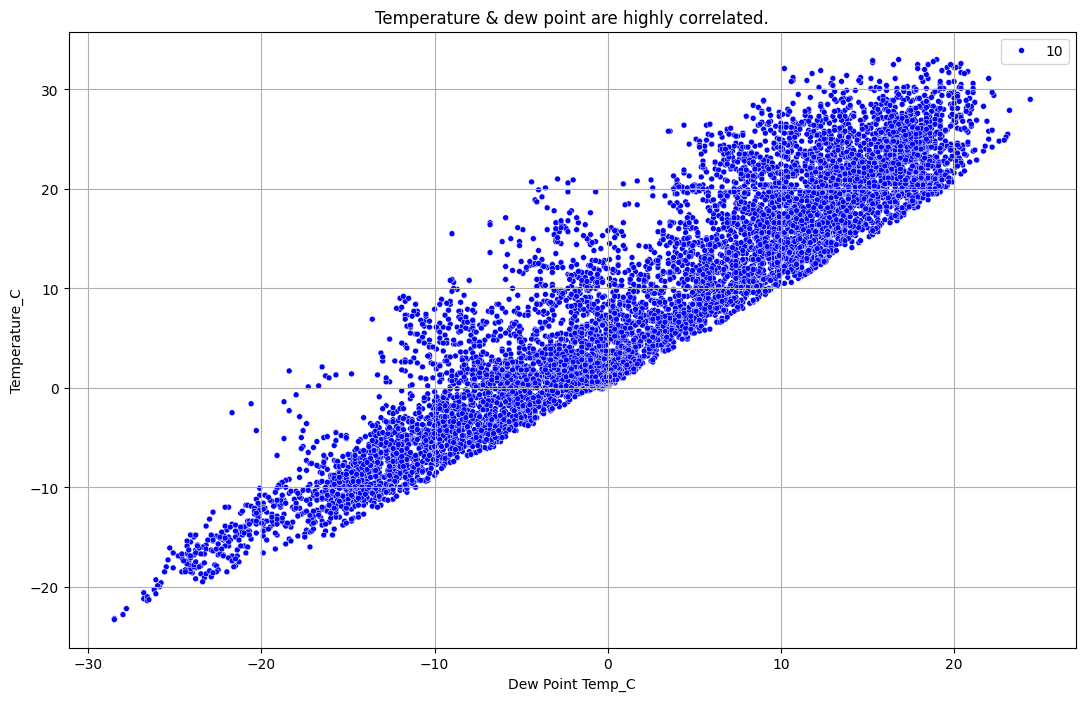

In [36]:
plt.figure(figsize=(13,8))
plt.grid()
sns.scatterplot(data=data,x= 'Dew Point Temp_C',y='Temperature_C',size=10,color="blue",)
plt.title("Temperature & dew point are highly correlated.")
plt.show()

Pressure drops often during Rain/Snow.

In [37]:
overall_pressure = data["Press_kPa"].mean()

overall_pressure_during_Rain_and_Snow = data[data["Weather"].str.contains("Rain" or "Snow")]["Press_kPa"].mean()

print(f"Overall Pressure : {overall_pressure}")
print(f"Pressure During Rain or Snow : {overall_pressure_during_Rain_and_Snow}")

Overall Pressure : 101.05162340619307
Pressure During Rain or Snow : 100.30583454281567


Find the number of times when the 'Weather is exactly Clear'.

In [ ]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [44]:
data.groupby(["Weather"]).get_group("Clear")

C:\Users\PAWAN\AppData\Local\Temp\ipykernel_26744\1653460916.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data.groupby(["Weather"]).get_group("Clear")


,Temperature_C,Dew Point Temp_C,Humidity_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Hour,Time_of_day
Date/Time,,,,,,,,,
2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear,19,Night
2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear,18,Night
2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear,19,Night
2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear,20,Night
2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear,21,Night
...,...,...,...,...,...,...,...,...,...
2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear,6,Day
2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear,10,Day
2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear,1,Night


In [52]:
exaclty_clear=data["Weather"][data["Weather"]== "Clear"].count()

In [54]:
print(f"{exaclty_clear} times there is exactly clear weather.")

1326 times there is exactly clear weather.
